In [1]:
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import cv2
%matplotlib inline
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [35]:
def get_edges_prewitt_vertical(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges_prewitt_vertical = prewitt_v(image)
    return edges_prewitt_vertical

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [40]:
new_list_train = []
for i in os.listdir('folder_filled/train_images/train'):
    image = cv2.imread('folder_filled/train_images/train/'+i)
    image = cv2.resize(image, (100, 100))
    new_list_train.append(get_edges_prewitt_vertical(image))

new_list_test = []
for i in os.listdir('folder_filled/test_images/test'):
    image = cv2.imread('folder_filled/test_images/test/'+i)
    image = cv2.resize(image, (100, 100))
    new_list_test.append(get_edges_prewitt_vertical(image))

In [41]:
df_train_pca = pd.DataFrame(new_list_train[0].reshape(1, -1))
df_test_pca = pd.DataFrame(new_list_test[0].reshape(1, -1))

In [42]:
for i in range(1, len(new_list_train)):
    df_train_pca = df_train_pca.append(pd.DataFrame(new_list_train[i].reshape(1,-1)))
for i in range(1, len(new_list_test)):
    df_test_pca = df_test_pca.append(pd.DataFrame(new_list_test[i].reshape(1,-1)))

/var/folders/hx/zshnl3dj6w33t23ztn0vvq6h0000gn/T/ipykernel_44841/314992117.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_pca = df_train_pca.append(pd.DataFrame(new_list_train[i].reshape(1,-1)))
/var/folders/hx/zshnl3dj6w33t23ztn0vvq6h0000gn/T/ipykernel_44841/314992117.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_pca = df_train_pca.append(pd.DataFrame(new_list_train[i].reshape(1,-1)))
/var/folders/hx/zshnl3dj6w33t23ztn0vvq6h0000gn/T/ipykernel_44841/314992117.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_pca = df_train_pca.append(pd.DataFrame(new_list_train[i].reshape(1,-1)))
/var/folders/hx/zshnl3dj6w33t23ztn0vvq6h0000gn/T/ipykernel_44841/314992117.py:2: FutureWarning: The frame.

In [43]:
scaler_train = StandardScaler()
scaler_train.fit(df_train_pca)
scaled_data_train = scaler_train.transform(df_train_pca)
pca = PCA(n_components=15)
pca.fit(scaled_data_train)
train_pca = pca.transform(scaled_data_train)

In [44]:
scaler_test = StandardScaler()
scaler_test.fit(df_test_pca)
scaled_data_test = scaler_test.transform(df_test_pca)
pca = PCA(n_components=15)
pca.fit(scaled_data_test)
test_pca = pca.transform(scaled_data_test)

In [45]:
df_train = pd.read_csv('folder_filled/train.csv')
df_train.drop(['toilets','image_id','address','city'], axis=1, inplace=True)

In [46]:
df_train.head()

,index,rooms,retail_price,sqft
0,5832,2.0,299000,1295.0
1,5584,3.0,299000,1566.0
2,9408,5.0,499990,3068.0
3,4644,4.0,849900,2230.0
4,5739,3.0,333490,1898.0


In [47]:
df_test = pd.read_csv('folder_filled/test.csv')
df_test.drop(['toilets','image_id','address','city'], axis=1, inplace=True)
df_test.head()

,index,rooms,sqft
0,3076,3,1510
1,3218,4,2342
2,9213,2,2845
3,10018,4,2379
4,11355,4,1836


In [12]:
import re

In [48]:
id_test = [] 
for i in os.listdir('folder_filled/test_images/test'):
    id_test.append(i.split('.')[0])
id_test

['9733',
 '63',
 '6400',
 '823',
 '5109',
 '11759',
 '6372',
 '11995',
 '10453',
 '10335',
 '9727',
 '77',
 '5135',
 '7722',
 '9069',
 '11765',
 '6428',
 '11017',
 '5121',
 '5874',
 '11956',
 '10490',
 '7911',
 '2869',
 '2699',
 '6399',
 '176',
 '5684',
 '2855',
 '1384',
 '9257',
 '2464',
 '10123',
 '6602',
 '9531',
 '6616',
 '9525',
 '10137',
 '11567',
 '3020',
 '4997',
 '10679',
 '5451',
 '8175',
 '5337',
 '3746',
 '10686',
 '4968',
 '6819',
 '3961',
 '3975',
 '8820',
 '6825',
 '412',
 '6831',
 '4940',
 '5519',
 '1019',
 '6762',
 '8997',
 '599',
 '4175',
 '2262',
 '10725',
 '4613',
 '5525',
 '1743',
 '9479',
 '6992',
 '8767',
 '7454',
 '3626',
 '1031',
 '8015',
 '7326',
 '1757',
 '5531',
 '8798',
 '10080',
 '3801',
 '1970',
 '4808',
 '214',
 '4820',
 '572',
 '6945',
 '3183',
 '8559',
 '957',
 '10255',
 '4363',
 '10533',
 '6212',
 '9135',
 '4377',
 '6560',
 '10269',
 '1541',
 '7130',
 '5727',
 '11605',
 '5733',
 '1555',
 '8217',
 '9684',
 '758',
 '980',
 '9848',
 '2935',
 '1582',
 '29

In [50]:
test_pca = pd.DataFrame(test_pca, columns=['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15'])
test_pca['index'] = id_test
test_pca.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,index
0,-6.694205,-10.690420,-6.874382,6.381376,-6.366573,-2.315977,-8.755055,6.534313,1.488573,-4.674482,-3.181350,-6.633624,-5.164093,9.360120,-5.621253,9733
1,-1.498633,1.068217,-2.371335,2.007358,-3.437038,-1.338802,-3.044005,-6.082467,-0.246068,-0.282045,-9.855291,6.079368,0.400424,-0.693198,-3.740768,63
2,1.699158,3.125946,-3.953728,11.883142,0.211783,3.755640,2.922787,2.824867,6.756002,-3.636409,0.403545,5.945751,-3.603047,-1.103542,-4.245580,6400
3,0.160658,-6.813487,6.279937,1.482241,3.400214,3.033886,1.389415,0.940911,6.616372,-0.515778,-8.525078,0.471301,-3.515593,-2.658450,-1.528588,823
4,0.758588,3.477833,-2.969297,-2.024772,1.506848,-1.932986,0.822462,-0.848228,-1.512284,-2.354263,2.638085,-1.905630,-0.158933,-0.034549,2.794928,5109


In [51]:
id_train = [] 
for i in os.listdir('folder_filled/train_images/train'):
    id_train.append(i.split('.')[0])
id_train

['4217',
 '3578',
 '10321',
 '2666',
 '11981',
 '10447',
 '2100',
 '4571',
 '7078',
 '1409',
 '9055',
 '6366',
 '189',
 '9041',
 '2114',
 '4565',
 '4203',
 '2672',
 '6414',
 '8439',
 '837',
 '2882',
 '3544',
 '11003',
 '1353',
 '8411',
 '7044',
 '8377',
 '1435',
 '5653',
 '3222',
 '5647',
 '2128',
 '3236',
 '11771',
 '4559',
 '7050',
 '8363',
 '1421',
 '1347',
 '7736',
 '8405',
 '2896',
 '3550',
 '10309',
 '9928',
 '638',
 '7905',
 '9096',
 '8388',
 '11942',
 '10484',
 '5860',
 '9082',
 '9914',
 '7939',
 '1390',
 '604',
 '2841',
 '3587',
 '5848',
 '5690',
 '162',
 '7087',
 '7093',
 '3593',
 '9900',
 '88',
 '610',
 '6164',
 '8149',
 '4773',
 '2302',
 '10645',
 '4015',
 '7508',
 '1179',
 '2470',
 '11229',
 '4001',
 '10889',
 '4767',
 '3008',
 '2316',
 '10651',
 '5479',
 '6170',
 '9243',
 '6158',
 '1637',
 '7246',
 '8613',
 '7520',
 '1151',
 '2458',
 '11201',
 '4029',
 '5323',
 '11215',
 '3752',
 '8607',
 '7534',
 '1145',
 '9519',
 '1623',
 '8161',
 '7252',
 '11573',
 '3034',
 '4983',
 '5

In [52]:
train_pca = pd.DataFrame(train_pca, columns=['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15'])
train_pca['index'] = id_train
train_pca.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,index
0,-4.004235,-0.015879,1.764260,-0.686445,2.460224,3.467665,0.047448,2.639535,-0.823238,-4.124651,0.744185,0.230226,-1.497267,2.008698,-2.781908,4217
1,-5.381671,-2.394668,-7.082483,1.914462,0.204752,0.746999,-0.986151,-3.615021,-0.807220,0.937052,2.405093,-0.994543,-2.419390,4.803011,0.207092,3578
2,-4.703280,-2.788214,-0.141148,4.264077,0.530765,-5.381970,4.005965,1.686611,-1.010195,6.108778,-4.617404,-8.090919,-6.651700,-1.292780,7.904645,10321
3,3.727001,-1.626867,3.493372,1.753428,-3.132223,-0.648600,4.940613,1.961541,-2.261446,-1.360944,-0.854307,-3.079499,2.049245,-10.685945,9.931935,2666
4,0.968961,7.543570,-2.869179,-3.748432,5.745954,-1.917040,-2.967439,-1.262801,2.445372,-2.456024,-0.846992,3.570667,0.051003,-2.020133,2.443220,11981


In [26]:
df_train.head()

,index,rooms,retail_price,sqft
0,5832,2.0,299000,1295.0
1,5584,3.0,299000,1566.0
2,9408,5.0,499990,3068.0
3,4644,4.0,849900,2230.0
4,5739,3.0,333490,1898.0


In [53]:
train_pca['index'] = train_pca['index'].astype(int)
df_train['index'] = df_train['index'].astype(int)
df_train = df_train.merge(train_pca, on='index', how='left')

In [54]:
test_pca['index'] = test_pca['index'].astype(int)
df_test['index'] = df_test['index'].astype(int)
df_test = df_test.merge(test_pca, on='index', how='left')

In [21]:
train_pca

,pca1,pca2,pca3,pca4,pca5,index
0,-4.004238,-0.011826,1.770011,-0.701326,2.348478,4217
1,-5.381672,-2.393727,-7.079374,1.918232,0.236866,3578
2,-4.703283,-2.788436,-0.149561,4.253263,0.393730,10321
3,3.727004,-1.637379,3.482071,1.777605,-3.158108,2666
4,0.968964,7.541547,-2.880066,-3.740455,6.009638,11981
...,...,...,...,...,...,...
8395,-5.868893,-8.130156,-0.872633,9.115257,2.737830,3561
8396,-2.305169,-5.946151,-3.331796,0.220640,1.015261,8434
8397,-0.577208,5.571077,2.424378,-9.945495,-1.228370,7707
8398,-2.394239,-4.411417,-0.487426,-1.337976,2.324857,6419


In [66]:
df_train.head()

,index,rooms,retail_price,sqft,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15
0,5832,2.0,299000,1295.0,-3.676138,-6.042746,2.957250,-2.824139,-4.083093,-2.877251,-0.439118,-2.718091,1.009560,9.879408,8.838018,0.367024,6.373871,5.899174,-3.503806
1,5584,3.0,299000,1566.0,-2.873065,-3.992828,-1.940002,0.012406,-4.508439,-2.548672,1.918176,0.292132,1.800390,1.940199,0.941218,0.834577,2.694121,-2.328581,0.255854
2,9408,5.0,499990,3068.0,0.661776,-4.317863,6.071687,-2.624807,-1.254158,-1.405999,3.380112,-2.574021,-4.211138,-2.825504,-2.934543,1.031163,1.943826,2.993028,-2.027201
3,4644,4.0,849900,2230.0,-2.036802,-0.785094,1.053889,1.557523,1.031300,0.168004,-0.653427,-0.093295,-2.011994,-3.951998,0.651748,-3.638324,0.077378,-1.565164,-1.084714
4,5739,3.0,333490,1898.0,0.239030,-0.810505,-3.380615,-0.471293,-2.823089,2.624430,2.705028,-1.317966,-0.236808,0.282877,2.736169,0.248621,-2.711054,-3.499307,-5.016925


In [67]:
df_test.head()

,index,rooms,sqft,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15
0,3076,3,1510,-1.910030,1.780668,-0.052338,-1.106062,1.817937,-3.355490,1.469204,1.116816,0.668644,0.281209,3.175963,0.303695,-0.459466,-4.627173,3.740564
1,3218,4,2342,1.016521,-0.271223,0.194389,-1.012145,0.965503,1.178674,-2.957799,-2.470636,1.739245,3.159110,-2.841806,-1.453857,-0.572778,5.413044,0.300555
2,9213,2,2845,-3.850924,1.918817,-2.954240,-5.782366,-3.792543,-8.216458,-10.140668,3.317836,8.088612,-5.096569,1.341317,0.235501,11.488501,-7.652053,7.303765
3,10018,4,2379,2.099685,-6.569214,-5.997963,0.649662,3.975329,3.256133,2.094267,-8.011833,-7.967707,2.568683,2.531900,-9.861255,5.701015,8.204123,6.080690
4,11355,4,1836,-1.271091,1.167773,4.622749,1.036401,0.559671,-1.210615,1.848245,0.372292,0.055954,-3.612763,-0.242816,-0.553189,0.725201,-0.954808,-1.552189


In [52]:
df_train.rename(columns = {'pca1_x':'pca1', 'pca2_x':'pca2'}, inplace = True)

In [53]:
df_train.head()

,index,rooms,retail_price,sqft,pca1,pca2
0,5832,2.0,299000,1295.0,-2.587846,-3.748382
1,5584,3.0,299000,1566.0,-2.129145,-3.325030
2,9408,5.0,499990,3068.0,1.026178,-3.387645
3,4644,4.0,849900,2230.0,-4.221012,0.773358
4,5739,3.0,333490,1898.0,-2.644358,-3.467030


In [54]:
df_test.head()

,index,rooms,sqft,pca1,pca2
0,3076,3,1510,-0.835852,0.162267
1,3218,4,2342,1.024523,3.522499
2,9213,2,2845,-2.465148,-1.889967
3,10018,4,2379,2.952842,-4.657385
4,11355,4,1836,0.023438,0.986804


In [68]:
df_train.to_csv('train_pca_2.csv', index=False)
df_test.to_csv('test_pca_2.csv', index=False)

In [69]:
train_data = pd.read_csv('train_pca_2.csv', index_col=0)
test_data = pd.read_csv('test_pca_2.csv', index_col=0)
train_data.dropna(inplace=True)
x_train, y_train = train_data.drop('retail_price', axis=1), train_data['retail_price']
x_test, y_test = test_data, train_data['retail_price']

In [70]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8061 entries, 5832 to 6812
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rooms   8061 non-null   float64
 1   sqft    8061 non-null   float64
 2   pca1    8061 non-null   float64
 3   pca2    8061 non-null   float64
 4   pca3    8061 non-null   float64
 5   pca4    8061 non-null   float64
 6   pca5    8061 non-null   float64
 7   pca6    8061 non-null   float64
 8   pca7    8061 non-null   float64
 9   pca8    8061 non-null   float64
 10  pca9    8061 non-null   float64
 11  pca10   8061 non-null   float64
 12  pca11   8061 non-null   float64
 13  pca12   8061 non-null   float64
 14  pca13   8061 non-null   float64
 15  pca14   8061 non-null   float64
 16  pca15   8061 non-null   float64
dtypes: float64(17)
memory usage: 1.1 MB


In [71]:
def scale_datasets(x_train, x_test):
    standard_scaler = StandardScaler()
    x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns)
    x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns)
    return x_train_scaled, x_test_scaled

x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [88]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
model = build_model_using_sequential()

In [89]:
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
  1/101 [..............................] - ETA: 45s - loss: 176.6799 - mean_squared_logarithmic_error: 176.6799

2023-01-23 01:04:50.131157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


101/101 [==============================] - 2s 13ms/step - loss: 18.9150 - mean_squared_logarithmic_error: 18.8733 - val_loss: 2.1613 - val_mean_squared_logarithmic_error: 2.1701
Epoch 2/10
  1/101 [..............................] - ETA: 0s - loss: 2.2631 - mean_squared_logarithmic_error: 2.2631

2023-01-23 01:04:51.421665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


101/101 [==============================] - 1s 10ms/step - loss: 1.0830 - mean_squared_logarithmic_error: 1.0816 - val_loss: 0.5011 - val_mean_squared_logarithmic_error: 0.5029
Epoch 3/10
101/101 [==============================] - 1s 10ms/step - loss: 0.3742 - mean_squared_logarithmic_error: 0.3740 - val_loss: 0.2861 - val_mean_squared_logarithmic_error: 0.2856
Epoch 4/10
101/101 [==============================] - 1s 9ms/step - loss: 0.2773 - mean_squared_logarithmic_error: 0.2771 - val_loss: 0.2507 - val_mean_squared_logarithmic_error: 0.2496
Epoch 5/10
101/101 [==============================] - 1s 9ms/step - loss: 0.2588 - mean_squared_logarithmic_error: 0.2589 - val_loss: 0.2398 - val_mean_squared_logarithmic_error: 0.2383
Epoch 6/10
101/101 [==============================] - 1s 9ms/step - loss: 0.2487 - mean_squared_logarithmic_error: 0.2487 - val_loss: 0.2334 - val_mean_squared_logarithmic_error: 0.2318
Epoch 7/10
101/101 [==============================] - 1s 10ms/step - loss: 0.24

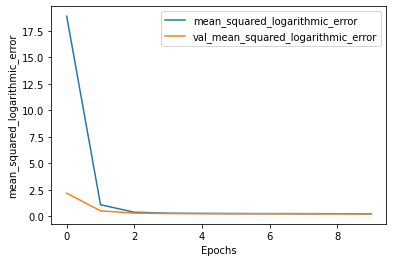

In [90]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [93]:
x_test_scaled.head()

,rooms,sqft,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15
0,-0.473747,-0.620265,-0.149370,0.215744,-0.005119,-0.153783,0.274555,-0.543882,0.265769,0.207072,0.120170,0.053290,0.612154,0.060508,-0.090900,-0.954942,0.764944
1,0.498719,0.172016,0.074234,-0.035287,0.027039,-0.140802,0.144537,0.193140,-0.529313,-0.452443,0.317616,0.589243,-0.552384,-0.286537,-0.113705,1.121669,0.063688
2,-1.446214,0.651003,-0.297665,0.232645,-0.383347,-0.800135,-0.581185,-1.334024,-1.819342,0.611707,1.488596,-0.948218,0.257119,0.047042,2.313672,-1.580576,1.491313
3,0.498719,0.207250,0.156993,-0.805791,-0.780059,0.088890,0.603612,0.530827,0.378029,-1.471135,-1.472587,0.479287,0.487517,-1.946655,1.148919,1.698946,1.241986
4,0.498719,-0.309828,-0.100552,0.140761,0.604222,0.142345,0.082638,-0.195236,0.333844,0.070200,0.007175,-0.671887,-0.049437,-0.108692,0.147518,-0.195389,-0.313999


In [91]:
x_test['retail_price'] = model.predict(x_test_scaled.values)

 59/113 [==============>...............] - ETA: 0s

2023-01-23 01:05:20.855113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


113/113 [==============================] - 0s 3ms/step


In [94]:
x_test.head()

,retail_price
index,
3076,374684.46875
3218,493089.34375
9213,820125.68750
10018,642548.93750
11355,451848.65625


In [92]:
x_test.drop(['rooms','sqft', 'pca1', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15'], axis=1, inplace=True)
x_test.head()

KeyError: "['rooms', 'sqft', 'pca1', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15'] not found in axis"

In [80]:
x_test.to_csv('submission_trial_1.csv')